# DOG-CAT CLASSIFICATION WITH DEEP CONVOLUTIONAL NEURAL NETWORKS



## Authentication to use Google Colab GPU's

In [1]:
from google.colab import drive
drive.mount('/gdrive')
# %cd /gdrive

Mounted at /gdrive


## Steps to directly use datasets from Kaggle on Google Colab

#### *Uploading the token file (.json format) created with the keras API*

In [ ]:
from google.colab import files
files.upload()

In [4]:
!ls -lha kaggle.json

!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d melvinpauljacob/cat-dog-dataset

-rw-r--r-- 1 root root 67 Dec 27 13:33 kaggle.json
 99% 538M/546M [00:07<00:00, 58.5MB/s]
100% 546M/546M [00:07<00:00, 72.0MB/s]


In [19]:
!unzip cat-dog-dataset.zip


Archive:  cat-dog-dataset.zip
replace dogscats/images/cats/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [6]:
!pwd
%ls

/content
cat-dog-dataset.zip  dogscats/  kaggle.json  sample_data/


## Importing Libraries

In [2]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, plot_model
from keras.preprocessing import image
from keras.callbacks import EarlyStopping

###  Look at the image samples in folders

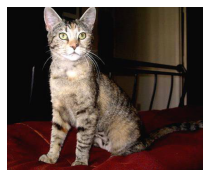

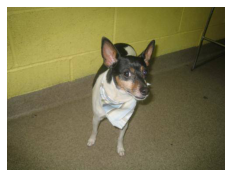

In [7]:
image_cat = image.load_img("dogscats/images/cats/cat.10000.jpg")
image_dog = image.load_img("dogscats/images/dogs/dog.10002.jpg")

plt.figure(figsize=(4,3))
plt.imshow(image_cat)
plt.axis("off")
plt.show()

plt.figure(figsize=(4,3))
plt.imshow(image_dog)
plt.axis("off")
plt.show()

## Converting images from files to dataset elements

*Converting images to arrays so that they can be used in the model.*

In [8]:
data_root = "dogscats/images"
print(os.listdir(data_root))

['dogs', 'cats']


### Preparation of train data

In [9]:
cats = "dogscats/images/cats"
dogs = "dogscats/images/dogs"

x_train = []
y_train = []

cat_image_files = []
for (dirpath, dirnames, filenames) in os.walk(cats):
    cat_image_files.extend(filenames)
    break

dog_image_files = []
for (dirpath, dirnames, filenames) in os.walk(dogs):
    dog_image_files.extend(filenames)
    break

size = (32,32)

# cats = 0, dogs = 1

for picture in cat_image_files:
  x = image.load_img(cats + "/" + picture, target_size=size)
  x = image.img_to_array(x, data_format="channels_last")
  x = x.astype("float32")
  x /= 255
  x_train.append(x)
  y_train.append(0)

for picture in dog_image_files:
  x = image.load_img(dogs + "/" + picture, target_size=size)
  x = image.img_to_array(x, data_format="channels_last")
  x = x.astype("float32")
  x /= 255
  x_train.append(x)
  y_train.append(1)

x_train = np.array(x_train)
y_train = np.array(y_train)
# y_train = np_utils.to_categorical(y_train, 2)

print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

x_train shape:  (23000, 32, 32, 3)
y_train shape:  (23000,)


### Preparation of Validation data

In [10]:
test_cats = "dogscats/valid/cats"
test_dogs = "dogscats/valid/dogs"

x_test = []
y_test = []

cat_image_files = []
for (dirpath, dirnames, filenames) in os.walk(test_cats):
    cat_image_files.extend(filenames)
    break

dog_image_files = []
for (dirpath, dirnames, filenames) in os.walk(test_dogs):
    dog_image_files.extend(filenames)
    break

size = (32,32)

# cats = 0, dogs = 1

for picture in cat_image_files:
  x = image.load_img(test_cats + "/" + picture, target_size=size)
  x = image.img_to_array(x, data_format="channels_last")
  x = x.astype("float32")
  x /= 255
  x_test.append(x)
  y_test.append(0)

for picture in dog_image_files:
  x = image.load_img(test_dogs + "/" + picture, target_size=size)
  x = image.img_to_array(x, data_format="channels_last")
  x = x.astype("float32")
  x /= 255
  x_test.append(x)
  y_test.append(1)

x_test = np.array(x_test)
y_test = np.array(y_test)
# y_test = np_utils.to_categorical(y_test, 2)

print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_test shape:  (2000, 32, 32, 3)
y_test shape:  (2000,)


# MODEL
![sampl model](https://miro.medium.com/max/913/0*RMiFvYXN3LEdIpSz.png)

In [21]:
model = Sequential([
          Conv2D(32, (3,3), padding="same", input_shape=(32, 32, 3), 
                 activation="relu", data_format="channels_last"),

          Conv2D(32, (3,3), activation="relu"),
          MaxPool2D(pool_size=(2,2)),
          Dropout(0.25),
          
          Conv2D(64, (3,3), padding="same", activation="relu"),

          Conv2D(64, (3,3), activation="relu"),
          MaxPool2D(pool_size=(2,2)),
          Dropout(0.25),

          Flatten(),

          Dense(512, activation="relu"),
          Dropout(0.5),
        
        # Since I thought the sigmoid function would work better with a single output unit, 
        # I converted the output layer of the model from two units to a single unit.
          Dense(1, activation='sigmoid')
            
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


## Visualizing the model structure

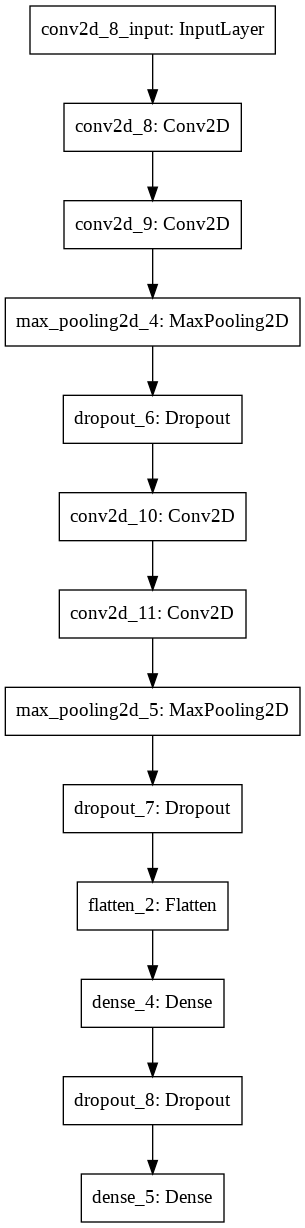

In [22]:
plot_model(model, to_file="/gdrive/MyDrive/for-github/Model_Structure.png")

## Training the model

In [12]:
early_stopping = EarlyStopping(min_delta=0.001, 
                               patience=5, 
                               restore_best_weights=True)

history = model.fit(x_train, y_train, 
                    batch_size=32, 
                    epochs=20, 
                    validation_data=(x_test, y_test), 
                    shuffle=True, 
                    verbose=1,
                    callbacks=[early_stopping])


Epoch 1/20
719/719 [==============================] - 11s 5ms/step - loss: 0.6767 - accuracy: 0.5578 - val_loss: 0.5779 - val_accuracy: 0.6900
Epoch 2/20
719/719 [==============================] - 3s 5ms/step - loss: 0.5627 - accuracy: 0.7105 - val_loss: 0.5039 - val_accuracy: 0.7530
Epoch 3/20
719/719 [==============================] - 3s 4ms/step - loss: 0.5047 - accuracy: 0.7517 - val_loss: 0.5074 - val_accuracy: 0.7525
Epoch 4/20
719/719 [==============================] - 3s 5ms/step - loss: 0.4679 - accuracy: 0.7764 - val_loss: 0.4400 - val_accuracy: 0.7910
Epoch 5/20
719/719 [==============================] - 3s 5ms/step - loss: 0.4339 - accuracy: 0.7971 - val_loss: 0.3988 - val_accuracy: 0.8220
Epoch 6/20
719/719 [==============================] - 3s 4ms/step - loss: 0.4031 - accuracy: 0.8119 - val_loss: 0.3905 - val_accuracy: 0.8295
Epoch 7/20
719/719 [==============================] - 3s 4ms/step - loss: 0.3973 - accuracy: 0.8171 - val_loss: 0.3735 - val_accuracy: 0.8360
Epoch

### Visualizing training results of model

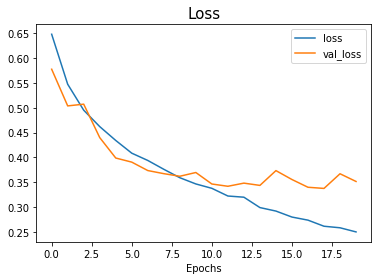

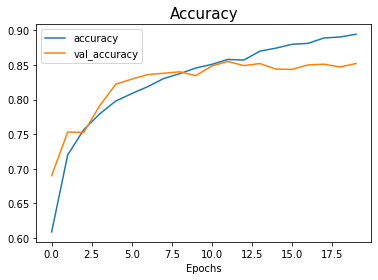

In [13]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Loss", fontsize=15)
plt.xlabel("Epochs")
plt.legend()
plt.show()
print("="*50)
print("="*50)
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy", fontsize=15)
plt.xlabel("Epochs")
plt.legend()
plt.show()

## Converting "test" images from files to dataset elements

*Converting "test" images to arrays so that they can be used in the model.*

In [14]:
samples = "dogscats/samples/"

x_samples = []
y_samples = []

image_files = []
for (dirpath, dirnames, filenames) in os.walk(samples):
    image_files.extend(filenames)
    break

size = (32,32)

# cats = 0, dogs = 1
i = 1
for picture in image_files:
    if picture.find("cat") != -1:
      print(i, picture)
      x = image.load_img(samples + "/" + picture, target_size=size)
      x = image.img_to_array(x, data_format="channels_last")
      x = x.astype("float32")
      x /= 255
      x_samples.append(x)
      y_samples.append(0)
    else:
      print(i, picture)
      x = image.load_img(samples + "/" + picture, target_size=size)
      x = image.img_to_array(x, data_format="channels_last")
      x = x.astype("float32")
      x /= 255
      x_samples.append(x)
      y_samples.append(1)
    i += 1

x_samples = np.array(x_samples)
y_samples = np.array(y_samples)

print("\nassigned values => ", y_samples)
print("\nx_samples shape: ", x_samples.shape)
print("y_samples shape: ", y_samples.shape)


1 dog.10459.jpg
2 cat.3570.jpg
3 cat.4785.jpg
4 cat.4319.jpg
5 dog.2423.jpg
6 dog.1402.jpg
7 dog.8643.jpg
8 cat.2921.jpg
9 cat.4600.jpg
10 dog.11314.jpg
11 cat.394.jpg
12 cat.11737.jpg
13 dog.8091.jpg
14 cat.2266.jpg
15 dog.9077.jpg
16 cat.4865.jpg
17 dog.6768.jpg
18 dog.5697.jpg
19 cat.5202.jpg
20 cat.10435.jpg
21 dog.6391.jpg
22 dog.4090.jpg
23 cat.9021.jpg
24 dog.1614.jpg

assigned values =>  [1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1]

x_samples shape:  (24, 32, 32, 3)
y_samples shape:  (24,)


## Predictions of test data and and accuracy rate 

In [15]:
preds = model.predict(x_samples)
predictions = []
for pred in preds:
  if pred >= 0.5:
    predictions.append(1)
  else:
    predictions.append(0)

print("\npredicted values => ", predictions)


predicted values =>  [1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1]


In [16]:
true_preds = 0

for i in range(len(predictions)):
  if predictions[i] == y_samples[i]:
    true_preds += 1

print("Accuracy rate in several test samples: %", (true_preds / len(predictions)) * 100)

Accuracy rate in several test samples: % 100.0


## Showing a result by visualizing an example from the data

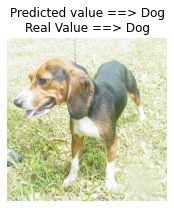

In [17]:
predicted = ""
real = "" 
if predictions[0] == 0:
  predicted = "Cat"
else:
  predicted = "Dog"

if y_samples[0] == 0:
  real = "Cat"
else:
  real = "Dog"

image_cat = image.load_img("dogscats/samples/dog.10459.jpg")

plt.figure(figsize=(4,3))
plt.imshow(image_cat)
plt.title(f"Predicted value ==> {predicted}\nReal Value ==> {real}")
plt.axis("off")
plt.show()

## Saving the model

In [18]:
model.save("/gdrive/MyDrive/for-github/Cats-and-dogs-classification-20epochs-bs32.h5")